### VITBERG PROSJEKT: Alexander Umansky @alexanum [FYSMAT] & Emil Spasov @emilssp [FYSMAT]

## Introduction


Machine learning is becoming a more and more important tool for data analysis with application across fields and disciplines. In this project we willl makle use of the so called dictionary method. The goal is to make a program that is able to classify handwritten digits. Pre-given a training MNIST dataset our program projects new test-data onto the old train-data and fully autonomously draws conclusion based on the goodness of the fit. 

The MNIST dataset is a standard set that includes 5000 handwritten digits (0-9) each 28x28 pixles. The images are grayscaled with each pixel having a value from 0 to 256 but in this project we scale them to values between 0 and 1.

Lets abstract from images and think of datasets as only sets of numbers. Given a training dataset $A$ (nxd), we can factor it out as $WH$ where $W$ is our Dictionary (mxd) and $H$ is is dxn matrix (with columns being the corresponding Latent values of $A$-columns). 

We will be using 2 different factorization methods SVD and ENFM to create our dictionaries. SVD is Singular value decomposition $A = USV$. Here $U$ will be the dictionary and $SV$ is the $H$ matrix. As mentioned earlier the data entries we work with are already non-negative. Therefore we can alternatively use ENMF (exemplar bases non-negative matrix factorization). An even simpler concept where we select a number of basises from $A$ at random. The main benefit of ENMF is that it does not require any training and factorization, wich becomes a big problem for large tasks rendering SVD method uselss. The downside is larger value errors when we calculate projections onto "cones" isntead of linear subspaces. To compensate for that a larger sample size is required. 

The Process of factorizing $A$ to get our dictionary is both time consuming and  expensive, therefore a more efficient way would be to select a number $d$ that gives a shorter run time yet still allows us to reconstruct a good enough A. On top of that if we choose $d$ too big we risk making our dictionary too generalized and actually decrease the accuracy of our code. In terms of our MNIST dataset out of the 5000 handwritten digits, ca. 500 for each digit is a big overkill and we can get away with much smaller d and still have good prediction capability. 

We have a Dictionary generated from test data $A$, now we want to test it using test data $B$. For each column $b$ in $B$ we project it on the columns of our dictionary, so that the distance between the projection and $b$ reveals how well $b$ fits the dictionary. Comparing projections on multiple dictionaries for each digit allows the program to decide the best fit.  


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageOps

sdf = 10e-10 #sdf = safe division factor (used to be defualt)            
DEFAULT_CLASSES = [0,1,2,3,4,5,6,7,8,9]                       

## Task 1

In [2]:
A_1 = np.array([[1000,1 ], [0, 1], [0, 0]])
A_2 = np.array([[1, 0, 0], [1, 0, 0], [0, 0, 1]])
b_1 = np.array([2, 1, 0])
b_2 = np.array([0, 0, 1])
b_3 = np.array([0, 1, 0])
B = np.array([b_1, b_2, b_3])
print("A_1 = ")
print(A_1)
print('')
print("A_2 = ")
print(A_2)
print('')
print("B = ")
print(B.T)

A_1 = 
[[1000    1]
 [   0    1]
 [   0    0]]

A_2 = 
[[1 0 0]
 [1 0 0]
 [0 0 1]]

B = 
[[2 0 0]
 [1 0 1]
 [0 1 0]]


### Exercise 1a

In [3]:
U, S, V = np.linalg.svd(A_1, full_matrices = False)
print("U = ")
print(U)
print("S = ")
print(S)
print("V = ")
print(V)

print('Check orthonormality:')
print('UU* =')
print((U@U.T))
print('U*U =')
print(U.T@U)
print('V*V =')
print(V.T@V)
print('VV* =')
print(V@V.T)

U = 
[[ 1.e+00 -1.e-06]
 [ 1.e-06  1.e+00]
 [ 0.e+00  0.e+00]]
S = 
[1.0000005e+03 9.9999950e-01]
V = 
[[ 0.9999995  0.001    ]
 [-0.001      0.9999995]]
Check orthonormality:
UU* =
[[1.00000000e+00 8.32531736e-23 0.00000000e+00]
 [8.32531736e-23 1.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]]
U*U =
[[ 1.00000000e+00 -8.32531736e-23]
 [-8.32531736e-23  1.00000000e+00]]
V*V =
[[1.00000000e+00 3.54566331e-21]
 [3.54566331e-21 1.00000000e+00]]
VV* =
[[ 1.00000000e+00 -3.54566331e-21]
 [-3.54566331e-21  1.00000000e+00]]


In [4]:
print(" ")
print(f"Max Singular value: {np.max(S)}")

print(" ")
print("Test reconstruction of A_1:")
print((U*S)@V)
print("")
print(U @ np.diag(S) @ V)   

 
Max Singular value: 1000.0005000003749
 
Test reconstruction of A_1:
[[ 1.00000000e+03  1.00000000e+00]
 [-2.18499053e-19  1.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]]

[[ 1.00000000e+03  1.00000000e+00]
 [-2.18499053e-19  1.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]]


In this section we are testing the numpy library function np.linalg.svd for $A_1$. As we see the resulting factors $U$, $S$ (in the rest of this document we will use $S$ instead of $\Sigma$) and $V^T$ have correct dimensions, and $U$ and $V^T$ are both orthogonal. Reconstruction of $A$ is very close (with an error attributed to numerical error). Out of the two basises of $A_1$ we see that it is the first column that produces the largest singular value: 100. For reconstruction purposes this is the column that carries most information and is pivotal for accurate reconstruction.

### Exercise 1b

In [5]:
U, S, V = np.linalg.svd(A_2, full_matrices = False)
print("U:")
print(U)
print("S")
print(S)
print("V")
print(V)

print(" ")
print('Check orthonormality:')
print('UU* =')
print((U@U.T))
print('U*U =')
print(U.T@U)
print('V*V =')
print(V.T@V)
print('VV* =')
print(V@V.T)


U:
[[-0.70710678  0.         -0.70710678]
 [-0.70710678  0.          0.70710678]
 [ 0.          1.          0.        ]]
S
[1.41421356 1.         0.        ]
V
[[-1. -0. -0.]
 [ 0.  0.  1.]
 [ 0.  1.  0.]]
 
Check orthonormality:
UU* =
[[ 1.00000000e+00 -1.33393446e-16  0.00000000e+00]
 [-1.33393446e-16  1.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
U*U =
[[ 1.00000000e+00  0.00000000e+00 -1.33393446e-16]
 [ 0.00000000e+00  1.00000000e+00  0.00000000e+00]
 [-1.33393446e-16  0.00000000e+00  1.00000000e+00]]
V*V =
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
VV* =
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [6]:
print(f"Max Singular: {np.max(S)}")

print(" ")
print("Test reconstruction of A_2:")
print((U*S)@V)

Max Singular: 1.4142135623730951
 
Test reconstruction of A_2:
[[1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]


SVD factorization of $A_2$ gives us one Singular value equal to 0. This means that during reconstruction of $A_2$ the column corresponding to this singular value in the dictionary is multiplied by 0 and is therefore unsignificant. Because of this, accurate reconstruction is possible with $d < 3$ columns in $U$ without significant information loss. This is directly linked to original matrix $A_2$ having two identical rows $[1, 0, 0]$. Reduced-SVD representation of this information can be safely done.


### Exercise 1c

In [7]:
def trunc_SVD(U, S, V, d):
    """
    Returns the first d columns of U 

    Args:
        U (ndarray): Left singular matrix 
        d (_type_): Number of columns of U

    Returns:
        (ndarray): Dictionary with d columns
    """
    H = S[:d]*V[:,:d]
    W = U[:,:d]
    return W, H

def orth_proj(W, M):
    """projects matrix M onto plane W

    Args:
        W (ndarray): _description_
        M (ndarry): _description_

    Returns:
        ndarray: Projections of M onto W
    """
    P = W@(W.T@M)          
    return P               

def distance(P, M):
    """
    Calculates the distance from a matrix to it's projection

    Args:
        P (ndarray): Projection
        M (ndarray): Matrix

    Returns:
        float: distance between M and P, non-negative 
    """
    dist = np.linalg.norm(M-P, axis=0)
    return dist

def rand_basis_selection(M, d):
    """ 
    Selects d random columns from M as basis

    Args:
        M (ndarray): matrix for a basis
        d (ndarray): number of columns

    Returns:
        ndarray: non-negative basis 
    """
    idx=[]
    A = np.copy(M.T)
    i=0
    
    while i<d:
        q = np.random.randint(0, A.shape[0])
        if not q in idx:
            idx.append(q)
            i+=1
    idx=np.array(idx)
    idx = np.sort(idx)
    W=A[idx]

    return W.T

def nnproj(W, M, max_iter = 50): 
    """
    Prohects M on non negative basis W

    Args:
        W (ndarray): Projection plane
        M (ndarray): Projection object
        max_iter (int, optional): number of iteration for approximating H. Defaults to 50.

    Returns:
        ndarray: projection of M on W
    """
    if len(M.shape)>1: 
        H_init = np.random.uniform(0 , 1, (W.shape[1], M.shape[1]))   #should have same dims as WtrM one from W and other from M (check if this makes sense mathematically !)
    else:
        H_init = np.random.uniform(0 , 1, (W.shape[1], ))   #should have same dims as WtrM one from W and other from M (check if this makes sense mathematically !)

    WtrM = W.T@M
    WtrW = W.T@W

    H_k = np.copy(H_init)
    for k in range(1, max_iter):
        H_k = H_k*WtrM/(WtrW@H_k + sdf)
    P = W@H_k     # maybe W has to be transposed and not H
    return P


### Exercise 1c


In [8]:
print("A_1:")
print(A_1)
print("\nB:")
print(B)
U, S, V = np.linalg.svd(A_1, full_matrices = False)
W, H = trunc_SVD(U, S, V, d=3-1)
print("\nW:")
print(W)
P = orth_proj(W, B)
D = distance(P, B)
print("\nP:")
print(P)
print("\nD:")
print(D)

A_1:
[[1000    1]
 [   0    1]
 [   0    0]]

B:
[[2 1 0]
 [0 0 1]
 [0 1 0]]

W:
[[ 1.e+00 -1.e-06]
 [ 1.e-06  1.e+00]
 [ 0.e+00  0.e+00]]

P:
[[2.00000000e+00 1.00000000e+00 8.32531736e-23]
 [1.66506347e-22 8.32531736e-23 1.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]]

D:
[2.22044605e-16 1.00000000e+00 1.11022302e-16]


In [9]:
print("A_2:")
print(A_2)
print("\nB:")
print(B)
U, S, V = np.linalg.svd(A_2, full_matrices = False)
W, H = trunc_SVD(U, S, V, d=3-1)
P = orth_proj(W, B)
D = distance(P, B)
print("\nP:")
print(P)
print("\nD:")
print(D)

A_2:
[[1 0 0]
 [1 0 0]
 [0 0 1]]

B:
[[2 1 0]
 [0 0 1]
 [0 1 0]]

P:
[[1.  0.5 0.5]
 [1.  0.5 0.5]
 [0.  1.  0. ]]

D:
[1.41421356 0.70710678 0.70710678]


Projecting $B$ on dictionary we acquire from $A_1$ gives us Distance vector $[0, 1, 0]$. Meaning excellent matching for columns 1 and 3, and worse for 2. 
Projecting B on dictionary we acquire from $A_2$ gives us higher distances and therefore worse overall fit.

### Exercise 1d

In [10]:
#testing dictionary generator
print("B:")
print(B)
W = rand_basis_selection(A_1, d = 2)
print("\nW:")
print(W)

B:
[[2 1 0]
 [0 0 1]
 [0 1 0]]

W:
[[1000    1]
 [   0    1]
 [   0    0]]


In [11]:
print("A_1:")
print(A_1)
print("\nB:")
print(B)

W = rand_basis_selection(A_1, d=2)                
P = nnproj(W, B, max_iter = 50)
print("\nP:")
print(P)

D = distance(P, B)
print("\nD:")
print(D)

A_1:
[[1000    1]
 [   0    1]
 [   0    0]]

B:
[[2 1 0]
 [0 0 1]
 [0 1 0]]

P:
[[1.99999894e+00 9.99998851e-01 5.00000000e-01]
 [1.45630726e-03 1.07155918e-03 5.00000000e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]]

D:
[0.00145631 1.00000057 0.70710678]


This section is testing the ENMF approach for the same training and test sets as we used for SVD. What used to give very small distances are now much larger up to the point where you can be sure it’s a good fit anymore. This is caused by ENMF method’s numerical error

## Task 2 

### Exercise 2a

(784, 10, 800)


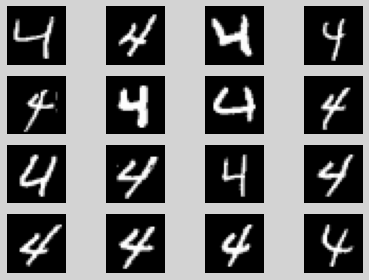

In [12]:
# Load the data and resclae
train = np.load('train.npy')/255.0
test = np.load('test.npy')/255.0


print(test.shape)

def plotimgs(imgs, nplot = 4):
    """
    Plots the nplot*nplot first images in imgs on an nplot x nplot grid. 
    Assumes heigth = width, and that the images are stored columnwise
    input:
        imgs: (height*width,N) array containing images, where N > nplot**2
        nplot: integer, nplot**2 images will be plotted
    """

    n = imgs.shape[1]
    m = int(np.sqrt(imgs.shape[0]))

    assert(n >= nplot**2), "Need amount of data in matrix N > nplot**2"

    # Initialize subplots
    fig, axes = plt.subplots(nplot,nplot)

    # Set background color
    plt.gcf().set_facecolor("lightgray")

    # Iterate over images
    for idx in range(nplot**2):

        # Break if we go out of bounds of the array
        if idx >= n:
            break

        # Indices
        i = idx//nplot; j = idx%nplot
            # Remove axis
        axes[i,j].axis('off')

        axes[i,j].imshow(imgs[:,idx].reshape((m,m)), cmap = "gray")
    
    # Plot

    fig.tight_layout()
    plt.show()


plotimgs(train[:,4,:], nplot = 4)
#s\

### Exercise 2b

(16, 784)


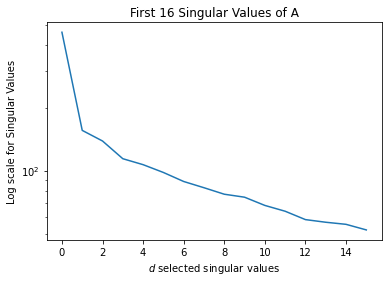

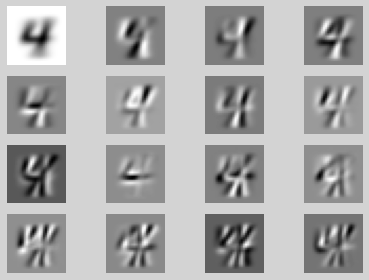

In [13]:
d=16
A=train[:,4,:]
U, S, V = np.linalg.svd(A, full_matrices = False)
W, H = trunc_SVD(U, S, V, d)
print(W.T.shape)
plt.semilogy(S[:16])
plt.ylabel("Log scale for Singular Values")
plt.xlabel("$d$ selected singular values")

plt.title("First 16 Singular Values of A")
plt.show()
plotimgs(W)

Above is a demonstration of the information provided about the digit 4 for different values of $d$. It seems as if the quality worsens from the 2 upper rows (d: 1-8) to the bottom 2 rows (d: 8-16). While the top images succeed in representing key attributes of the digit 4 like the “leg” and the “hook”, the ones on the bottom are a blury mesh of multiple different “styles” that can easily be mistaken with other digits. 
The suplementrary plot shows logarithmic scale of singular values as function of increasing d. The highest singular values correspond to the most precise images, as more infromation is stored, while the "messy" ones correspond to lowest Singular values. 


### Exercise 2c

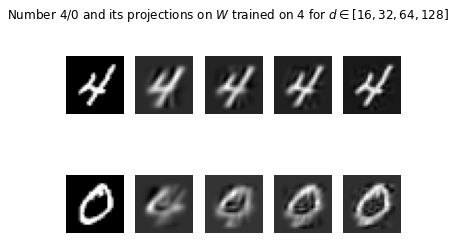

In [14]:
A = train[:,4,:]
b = train[:,0,0]
fig, axs = plt.subplots(2,5)
fig.suptitle("Number 4/0 and its projections on $W$ trained on 4 for $d \in [16,32,64,128]$")
k = 4
d = 16
U, S, V = np.linalg.svd(A, full_matrices = False)
axs[0][0].imshow(A[:,1].reshape((28, 28)), cmap = "gray")
axs[0][0].set_axis_off()
axs[1][0].imshow(b.reshape((28, 28)), cmap = "gray")
axs[1][0].set_axis_off()
for i in range (1,k+1):
    W, H = trunc_SVD(U, S, V, d)
    proj_A = orth_proj(W, A[:,1])
    proj_b = orth_proj(W,b)
    axs[0][i].imshow(proj_A.reshape((28, 28)), cmap = "gray")
    axs[0][i].set_axis_off()
    axs[1][i].imshow(proj_b.reshape((28, 28)), cmap = "gray")
    axs[1][i].set_axis_off()
    d = 2*d

We test our dictionary with the same digit it has been trained to recongize. As $d$ increases, we get an image that more accurately resembles the test input. This visually follows from the projection lining up well and the image being sharp with well defined contour. The last $d = 128$ is a very good copy, tho even for  $d = 16$ the shape of the digit is recognizable, tho blury.  $$ $$
Now we test with a different digit, program was not trained for. The quality drop is significant and the projection is clearly off, as the first images are a collage of both digits all blured out. For the last image it looks like 0 is the most dominant shape and the conotur is well defined.


### Exercise 2d

(784,)


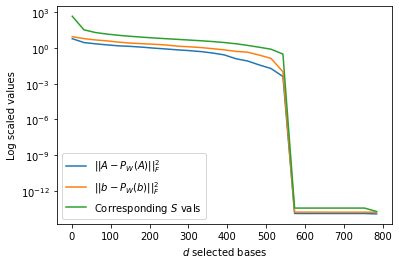

In [15]:
k = np.linspace(1,784,27,dtype="int")
dist = np.zeros((2,k.size))
print(proj_A.shape)
img = A[:,1]
for i in range(k.size):
    W, H = trunc_SVD(U, S ,V, k[i])
    proj_A = orth_proj(W,img)
    proj_b = orth_proj(W,b)
    dist[0][i] = distance(proj_A, img)
    dist[1][i] = distance(proj_b, b)

S_k = np.zeros(k.size)
for i in range(k.size):
    S_k[i] = S[k[i]-1]
plt.semilogy(k,dist[0],label="$||A-P_W(A)||_F^2$")
plt.semilogy(k,dist[1],label="$||b-P_W(b)||_F^2$")
plt.semilogy(k, S_k, label = "Corresponding $S$ vals" )
plt.ylabel("Log scaled values")
plt.xlabel("$d$ selected bases")
plt.legend()
plt.show()

Now we analyse the Distance graphically as function of $d$ for the 2 scenarios described in 2c aswell as the Singular values. We recall from 2b that the size of the Singular values is a way of saying how much infromation is collected. More information correlates with the distance being smaller. It is therefore no suprise that the green graph is closely alligned witht he other two, and get the same overall behaviour. The graphs begins slowly decreasing until approximately d = 550 after that the distance quickly drops substantially. 

### Exercise 2e

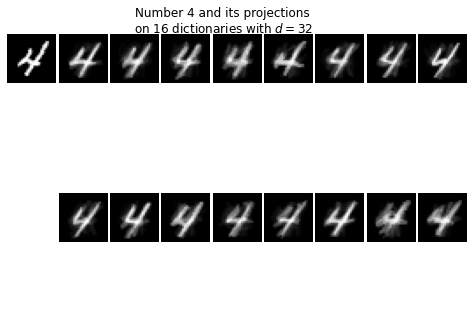

In [16]:
A=train[:,4,:]
k = 16

fig,axs = plt.subplots(2,k//2+1)
fig.tight_layout(pad=-3)
fig.suptitle("Number 4 and its projections \non 16 dictionaries with $d=32$")

d = 32

axs[0,0].imshow(A[:,1].reshape((28,28)), cmap = "gray")
axs[0,0].set_axis_off()
#axs[1,0].imshow(A[:,1].reshape((28,28)), cmap = "gray")
axs[1,0].set_axis_off()
for j in range(2):
    for i in range (1,k//2+1):
        W = rand_basis_selection(A,d)
        proj_A=nnproj(W,A[:,1],d)
        axs[j,i].imshow(proj_A.reshape((28,28)), cmap = "gray")
        axs[j,i].set_axis_off()

Above we demenstrate the ENMF mothod by selecting 32 random columns from A and ploting the projections. Due to random selection there is no quality rating and both good and bad fits come in no paritcular order. Once again you se the difference between a good fit and a bad one, by how blury the contours of the digit are. The better ones are much sharper and overall the digit is well contrasted (no gradient near the contour).

### Exercise 2f

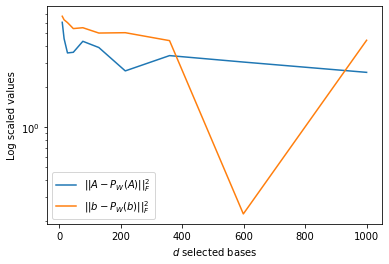

In [17]:
d_arr = np.logspace(1,3,num=10, dtype = np.int64)
b=train[:,4,0]
dist = np.zeros((2,d_arr.size))

for i in range(d_arr.size):
    W = rand_basis_selection(A,d_arr[i])
    proj_A=nnproj(W,A[:,1])
    proj_b=nnproj(W,b)
    dist[0][i]=distance(proj_A,A[:,1])
    dist[1][i]=distance(proj_b,b)

plt.semilogy(d_arr,dist[0],label="$||A-P_W(A)||_F^2$")
plt.semilogy(d_arr,dist[1],label="$||b-P_W(b)||_F^2$")
plt.ylabel("Log scaled values")
plt.xlabel("$d$ selected bases")
plt.legend()
plt.show()
        


Above is another plot that demosntrates how the distance changes as function of $d$ only this time for EMNF. Remember from 2d that with SVD we had a slow and then fast projection improvement. In the case with EMNF its somewhat different as the exact behaviour does now also depend on what kind of characters we choose and how many digits are used for training. There might accur sudden turning points after wich the distance suddenly jumps up, however the general trend is an immideadte but steady decreasment of distance. 

## Task 3

### Exercise 3a

In [18]:
def create_dict_matrix_SVD(train, d):
    """Creates an array of dictionaries for classes 0-9 
    using the SVD method

    Args:
        train (ndarray): train set, 
        d (_type_): number of columns for each dictionary

    Returns:
        ndarray: an array with dictionaries 
    """
    W = []  
    for i in range(train.shape[1]):
        U, S, V = np.linalg.svd(train[:,i,:], full_matrices = False)
        W.append(trunc_SVD(U, S, V, d)[0])
    W = np.transpose(np.array(W),(1,0,2))
    return W

def create_dict_matrix_ENMF(train, d):
    """Creates an array of dictionaries for classes 0-9 
    using the ENMF method

    Args:
        train (ndarray): train set, 
        d (_type_): number of columns for each dictionary

    Returns:
        ndarray: an array with dictionaries 
    """
    W = []
    for i in range(train.shape[1]):
        W_temp = rand_basis_selection(train[:,i,:],d)                        
        W.append(W_temp)
    W = np.transpose(np.array(W),(1,0,2))
    return W

W_SVD = create_dict_matrix_SVD(train, d = 32)
W_ENMF = create_dict_matrix_ENMF(train, d = 32)

In [19]:
def bestfit_SVD(W_SVD, classes, b):
    """Calculates the distance from b to its projection on each element of W_SVD
    using SVD method
    Args:
        W_SVD (ndarray): array of dictionaries
        classes (list): list with allowed classes
        b (ndarray): a test object

    Returns:
        ndarray: distance to the projection on each plane in W_SVD
        int: class that gives minimal distance 
    """
    dist = []
    for i in range(W_SVD.shape[1]):
        dist.append(np.linalg.norm(distance(orth_proj(W_SVD[:, i,:],b),b)))
    dist = np.array(dist)
    return dist, classes[np.argmin(dist)]

def score_dataset_SVD(W_SVD, classes, B):
    """ apply bestfit_SVD to all instances of classes in B

    Args:
        W_SVD (ndarray): array of dictionaries
        classes (list): list with allowed classes
        B (ndarray): array of test objects 

    Returns:
        ndarray: distance to the projection on each plane in W_SVD
        ndarray: classes that minimal distance for each object in B 
    """
    D = []
    numbers = []
    for i in range(B.shape[1]):
        for j in range(B.shape[2]):
            D_temp,number = bestfit_SVD(W_SVD,classes,B[:,i,j])
            D.append(D_temp)
            numbers.append(number)
    D = np.array(D)
    numbers = np.array(numbers)
    return D, numbers

def bestfit_ENMF(W_ENMF, classes, b):
    """Calculates the distance from b to its projection on each element of W_ENMF
    using ENMF method

    Args:
        W_ENMF (ndarray): array of dictionaries
        classes (list): list with allowed classes
        b (ndarray): a test object

    Returns:
        ndarray: distance to the projection on each plane in W_ENMF
        int: class that gives minimal distance 
    """
    dist = []
    for i in range(W_ENMF.shape[1]):
        dist.append(np.linalg.norm(distance(nnproj(W_ENMF[:,i,:],b),b)))
    dist = np.array(dist)
    return dist, classes[np.argmin(dist)]

def score_dataset_ENMF(W_ENMF,classes, B):
    """ apply bestfit_ENMF to all instances of classes in B

    Args:
        W_ENMF (ndarray): array of dictionaries
        classes (list): list with allowed classes
        B (ndarray): array of test objects 

    Returns:
        ndarray: distance to the projection on each plane in W_ENMF
        ndarray: classes that minimal distance for each object in B 
    """
    D = []
    numbers = []
    for i in range(B.shape[1]):
        for j in range(B.shape[2]):
            D_temp, number = bestfit_ENMF(W_ENMF,classes,B[:,i,j])
            D.append(D_temp)
            numbers.append(number)
    D = np.array(D)
    numbers = np.array(numbers)

    return D, numbers

### Exercise 3b

In [20]:
def test_img_selection(test,n, numbers=[], mode='single'):
    """ Selects instances from test set

    Args:
        test (ndarray): Test set
        n (int): number of objects to be picked from test when numbers is not specified
        numbers (list, optional): Classes of which to get instances from the test set. 
            If default [] pick random number(s) 0-9.
        mode (str, optional): Pick one or multiple instances of each number in the test set.
            'single'/'multiple' . Defaults to 'single'.

    Returns:
        ndarray: Array with instances from the test set
    """
    nums = []
    Bj=[]
    i=0
    if not numbers:
        if mode=='single':
            while i<n:
                j = np.random.randint(0, test.shape[1])
                k = np.random.randint(0, test.shape[2])
                if not j in nums:
                    nums.append(j)
                    Bj.append(test[:,j,k])
                    i+=1
            return np.array(Bj).T, np.array(nums)

        if mode == 'multiple':
            while i<n:
                j = np.random.randint(0, test.shape[1])
                if not j in nums:
                    nums.append(j)
                    Bj.append(test[:,j,:])
                    i+=1
            return np.array(Bj).transpose(1,0,2), np.array(nums)
    else:
        if mode=='single':
            while i<len(numbers):
                j = numbers[i]
                k = np.random.randint(0, test.shape[2])
                if not j in nums:
                    nums.append(j)
                    Bj.append(test[:,j,k])
                    i+=1
            return np.array(Bj).T, np.array(nums)

        if mode == 'multiple':
            while i<len(numbers):
                j = numbers[i]
                if not j in nums:
                    nums.append(j)
                    Bj.append(test[:,j,:])
                    i+=1
            return np.array(Bj).transpose(1,0,2), np.array(nums)
   

In [21]:
def accuracy(B,nums, n, classes= DEFAULT_CLASSES, mode = 'multiple', method='svd'):
    """Calculates the accuracy of predictions

    Args:
        B (ndarray): array with objects to classify
        nums (ndarray): the numbers each object in B represents
        n (int): number of objects
        classes (ndarray, optional): array with classes. Defaults to DEFAULT_CLASSES.
        mode (str, optional): Either'single'/'multiple' instances of each class. Defaults to 'multiple'.
        method (str, optional): Method of classification. Either'svd'/'enmf. Defaults to 'svd'.

    Returns:
        _type_: _description_
    """
    accurate=0
    right = []
    wrong = []

    if method=='svd':
        if mode =='single':
            for i in range(n):
                class_SVD=bestfit_SVD(W_SVD,classes,B[:,i])[1]
                if class_SVD==nums[i]:
                    accurate +=1 
                    right.append(B[:,i])
                else:
                    wrong.append(B[:,i])
            return accurate/n,np.array(right),np.array(wrong)

        if mode =='multiple':
            class_SVD=score_dataset_SVD(W_SVD,classes,B)[1]
            for i in range(n):
                
                acc_temp = np.sum(class_SVD[i*B.shape[2]:(i+1)*B.shape[2]]==nums[i])
                
                accurate += acc_temp
            return accurate/(n*B.shape[2])

    elif method == 'enmf':
        if mode =='multiple':
            class_ENMF=score_dataset_ENMF(W_ENMF,classes,B)[1]
            for i in range(n):
                acc_temp = np.sum(class_ENMF[i*B.shape[2]:(i+1)*B.shape[2]]==nums[i])
                
                accurate += acc_temp
            return accurate/(n*B.shape[2])

        if mode == 'single':
            for i in range(n):
                class_ENMF=bestfit_ENMF(W_ENMF,classes,B[:,i])[1]
                if class_ENMF==nums[i]:
                    accurate +=1 
                    right.append(B[:,i])
                else:
                    wrong.append(B[:,i])
            return accurate/n, np.array(right), np.array(wrong)

In [22]:
n=3
B, nums = test_img_selection(test,n,[4,6,7],mode = 'multiple')
print("SVD total accuracy: {:.2f}%".format(accuracy(B,nums,n)*100))
print("ENMF total accuracy: {:.2f}%".format(accuracy(B,nums,n,method='enmf')*100))

SVD total accuracy: 95.38%
ENMF total accuracy: 91.04%


In [23]:
B, nums = test_img_selection(test,n,[0, 1, 3],mode = 'single')
print("SVD total accuracy: {:.2f}%".format(accuracy(B,nums,n,mode='single')[0]*100))
print("ENMF total accuracy: {:.2f}%".format(accuracy(B,nums,n,mode='single',method='enmf')[0]*100))

SVD total accuracy: 100.00%
ENMF total accuracy: 100.00%


In the cells above we compare accuracies for the different methods aswell as showcasing how it differs for different digits. Between SVD and EMNF, SVD scores the highest firmly around 95% while ENMF has values below 90. This is to be expected for low values of d, as ENMF sacrifices pricission for time efficiency.
Another thing to note is that digits themselves have an effect on how well the program classifies them. Obviosuly digits like 1 or 0 are have most unique design and thefore give the highest scores. While other digits can be more problemetic where some digits might share atributes with others. For example we noticied the biggest challenge our program faces is the digit 6 that the porgram often misclassifies as 5.  

### Exercise 3c

1


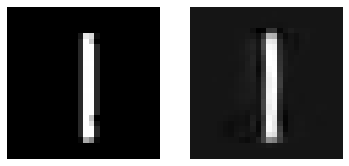

In [24]:
def getImg(test,W,num):
    '''
    Gets the instance of num in the test set that gives
    min/max distance to the basis (dictionary W)
    '''
    dist=[]
    for i in range(test.shape[2]):
        P_i = orth_proj(W, test[:,num,i])
        dist.append(distance(test[:,num,i],P_i))

    dist=np.array(dist)
    idx=np.argmin(dist)
    P = orth_proj(W,test[:,num,idx])

    fig, axs = plt.subplots(1,2)
    axs[0].imshow(test[:,num,idx].reshape((28,28)),cmap='gray')
    axs[1].imshow(P.reshape((28,28)),cmap='gray')
    axs[0].set_axis_off()
    axs[1].set_axis_off()

    return idx, P

print(nums[1])
idx,P=getImg(test,W_SVD[:,nums[1],:],nums[1])

### Exercise 3d

In [25]:
n=3
wrong = accuracy(B,nums,n,mode='single')[2]  
if wrong.size!=0:
    wrong=wrong[0]
    j=0
    i=0

    fig, axs = plt.subplots(2,6)
    axs[0][0].imshow(wrong.reshape((28,28)),cmap='gray')
    axs[0][0].set_axis_off()
    axs[1][0].set_axis_off()
    k=0
    for j in range(0,2):
        for i in range (1,6):
            axs[j,i].imshow(orth_proj(W_SVD[:,k,:],wrong).reshape((28,28)),cmap='gray')
            axs[j,i].set_axis_off()
            k+=1
else:
    print('All classifications are correct!')

All classifications are correct!


When missclassifications are found we print a set of images the programm struggled most with. This images are mostly blury shapes with washed out contours and/or shapes that have attributes that fit multiple digits at the same time. 

### Exercise 3e

In [26]:
B_temp, nums_temp = test_img_selection(test,1,[5],mode = 'single')
B = np.append(B,B_temp, axis=1)

print("SVD total accuracy: {:.2f}%".format(accuracy(B,nums,n,mode='single')[0]*100))
print("ENMF total accuracy: {:.2f}%".format(accuracy(B,nums,n,mode='single',method='enmf')[0]*100))

SVD total accuracy: 100.00%
ENMF total accuracy: 100.00%


We notice increasing accuracy as expected. The more digits we train the program for, the higher the chance the test digits is one of them ressulting in overall improved accuracy rate. Once again this has much to do with what kind of digits we choose to include. Some are more easily distinguishable than others. 

### Exercise 3f

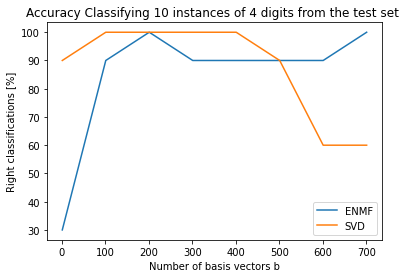

In [27]:
n = 1
sdf = 1e-2
accuracy_arr_SVD = np.array([])
accuracy_arr_ENMF = np.array([])
classes = [4, 5, 6, 7]      
d_arr = np.arange(1,800,100)
B, nums = test_img_selection(test[:,:,:10],n,classes, mode = 'multiple')
U = []
V = []
S = []

for c in classes:
    U_temp, S_temp, V_temp = np.linalg.svd(train[:,c,:], full_matrices = False)
    U.append(U_temp)
    S.append(S_temp)
    V.append(V_temp)

U=np.array(U)
S=np.array(S)
V=np.array(V)
i=0


for d in d_arr:
    
    W_SVD=[]
    for i in range(len(classes)):
        W_SVD.append(trunc_SVD(U[i], S[i], V[i], d)[0])  

    W_SVD = np.array(W_SVD).transpose(1,0,2)       
    W_ENMF = create_dict_matrix_ENMF(train[:,4:8,:], d)

    accuracy_arr_SVD = np.append(accuracy_arr_SVD, accuracy(B, nums, n, classes)*100)
    accuracy_arr_ENMF = np.append(accuracy_arr_ENMF, accuracy(B, nums, n, classes, method='enmf')*100)
    i+=1    

plt.plot(d_arr, accuracy_arr_ENMF, label = "ENMF")
plt.plot(d_arr, accuracy_arr_SVD, label = "SVD")
plt.title("Accuracy Classifying 10 instances of 4 digits from the test set ")
plt.xlabel('Number of basis vectors b')
plt.ylabel('Right classifications [%]')
plt.legend()
plt.show()

Graph above demonstrates how choice of d (number of basis vectors) effects the accuracy for SVD and EMNF methods. Again the exact shape depens on how many and what kind of digits we train for, but the main difference is that SVD starts with highest accuracy keeps the value steady up untill roughly d = 400 after wich the accuracy starts dropping untill it stabelizes on a new value around 60%.

EMMF has a growing trend from the start that eventually brings it to a steady high level. The graph then has a sudden drop like with SVD but at a critical value it starts growing again, whereas SVD keeps dropping. For high d starting from 500 ENMF has significanly better accuracy while SVD dominates at lower values. 

## *PROJECT EXTRA: user input*

In [28]:
W_SVD = create_dict_matrix_SVD(train, d = 32)
W_ENMF = create_dict_matrix_ENMF(train, d = 32)

This section allows to test users own handwritten digit. Given a png file with the drawing, the pogram does the neccecary edits to the image, before comparing it to the entries in the pre trained dictionaries. Finally propgram outputs the class that recieved the highest score. 

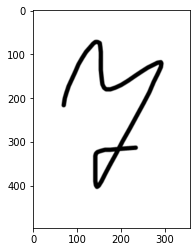

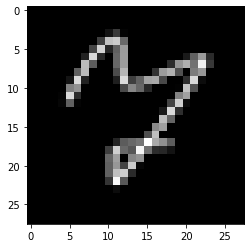

Class: 7


In [29]:
filename = '7'
file = rf'{filename}.png'
test_img = ImageOps.grayscale(Image.open(file))
plt.imshow(test_img, cmap = 'gray')
test_img = ImageOps.invert(test_img)
plt.show()
test_img_opt = test_img.resize((28,28))

test_img_arr = np.reshape(np.array(test_img_opt),(784,))

plt.imshow(test_img_arr.reshape((28,28)), cmap = 'gray')
plt.show()
print('Class:',bestfit_SVD(W_SVD, DEFAULT_CLASSES, test_img_arr)[1])

## Conclusion


In this project we sucessfully taught a machine to fully automatically recognize handwritten digits based on what it was previoulsly taught in the train phase. 
The whole classificasion is based on dictionary learning. New test data gets projected onto existing train data and the calculated projection and distances reveal how close new data is to something the program has already seen before. $$ $$

In this project we explored two different dictionary generating methods SVD and ENMF. Throughout the project we tested both the methods for strengths and weaknesses in order to find where each is more suited - yields best ressults AND most efficient execution. $$ $$

SVD is the most recource expensive as it always has to do the factorization that as dicussed might become a big run time issue for larger projects. The benefit is overall studriness as it's both more mathematical precise, and has most advanced method for storing usefull and filtering out uneccecary information. This is the go-to method for small samplespaces and training sets (small d values). $$ $$

ENMF on the other hand is based entirely on random selection. This method saves run-time, and as long as the datasets are suffiucently large it will yield satisfacoty accuracy not far behind SVD. As we checked in part 1 both reconstruction capability and data storage suffers when we deal with small training sets. Accidental removal of an important basis is just as probalble as useless one. The only real protection in larger datasets- larger number of basises that cary important infromation that survive the random selection. $$ $$

ENMF is not the only contributor of randomness as handwritten digits have added issues. Some are easier to classify by default as they are very unique, while others share desing features and are easily interchangable. The MNIST dataset has aswell some questionable" entries (that even a human can missclassify) adds another layer unperdictable errors. The more digits our programm is trained for the better the total prediction accuracy will be. But this is again cost efficient and not always the favorable dicission in industry. The Program is still capable of accurate classification as long as we are clever about how much and what kind of training to give it. $$ $$

To think that the whole process can be summraized down to the fact that we just represent images as sets with digits after wich is just plain linear algebra all the way to the final numpy.argmin and the programm has the class (we hopefully expect), practically doing a memory based but autonomous dicission.